In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
#for test train split
from sklearn.model_selection import train_test_split
#for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# setting the option to display all the columns
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("attrition.csv")
data.head(10)

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
5,32,0,Travel_Frequently,Research & Development,Life Sciences,4,Male,3,1,4,Single,3068,No,8,2,7,7,3,6,2
6,59,0,Travel_Rarely,Research & Development,Medical,3,Female,4,1,1,Married,2670,Yes,12,2,1,0,0,0,3
7,30,0,Travel_Rarely,Research & Development,Life Sciences,4,Male,3,1,3,Divorced,2693,No,1,3,1,0,0,0,24
8,38,0,Travel_Frequently,Research & Development,Life Sciences,4,Male,2,3,3,Single,9526,No,10,3,9,7,1,8,23
9,36,0,Travel_Rarely,Research & Development,Medical,3,Male,3,2,3,Married,5237,No,17,2,7,7,7,7,27


In [4]:
# get summary and info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  OverTime                 1470 non-null   object
 13  TotalWorkingYears        1470 non-null   int64 
 14  WorkLifeBalance          1470 non-null  

In [5]:
data.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [6]:
# check for nulls
display(data.isnull().any())


Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
EducationField             False
EnvironmentSatisfaction    False
Gender                     False
JobInvolvement             False
JobLevel                   False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
OverTime                   False
TotalWorkingYears          False
WorkLifeBalance            False
YearsAtCompany             False
YearsInCurrentRole         False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
DistanceFromHome           False
dtype: bool

We can see there are no nulls in the data 

In [7]:
data = pd.get_dummies(data)
data.head()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,2,3,2,4,5993,8,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1
1,49,0,3,2,2,2,5130,10,3,10,7,1,7,8,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,37,1,4,2,1,3,2090,7,3,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1
3,33,0,4,3,1,3,2909,8,3,8,7,3,0,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
4,27,0,1,3,1,2,3468,6,3,2,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [8]:
#Separating Features and Target variables
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

In [9]:
# get frequency of values and their percent in attrition column
attrition_freq = data[['Attrition']].apply(lambda x: x.value_counts())
attrition_freq['frequency_percent'] = round((100 * attrition_freq / attrition_freq.sum()), 2)

print(attrition_freq)

   Attrition  frequency_percent
0       1233              83.88
1        237              16.12


In [10]:
# split into train, test with stratification on target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify = y, random_state = 100)  

## Decision tree classifier simple

In [33]:
# buid and fit decision tree
classifier_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 5, random_state = 100)

classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [34]:
from sklearn.tree import plot_tree #for visualizing tree

In [35]:
type(y_train)

pandas.core.series.Series

In [36]:
feature_cols = X_train.columns.to_list()

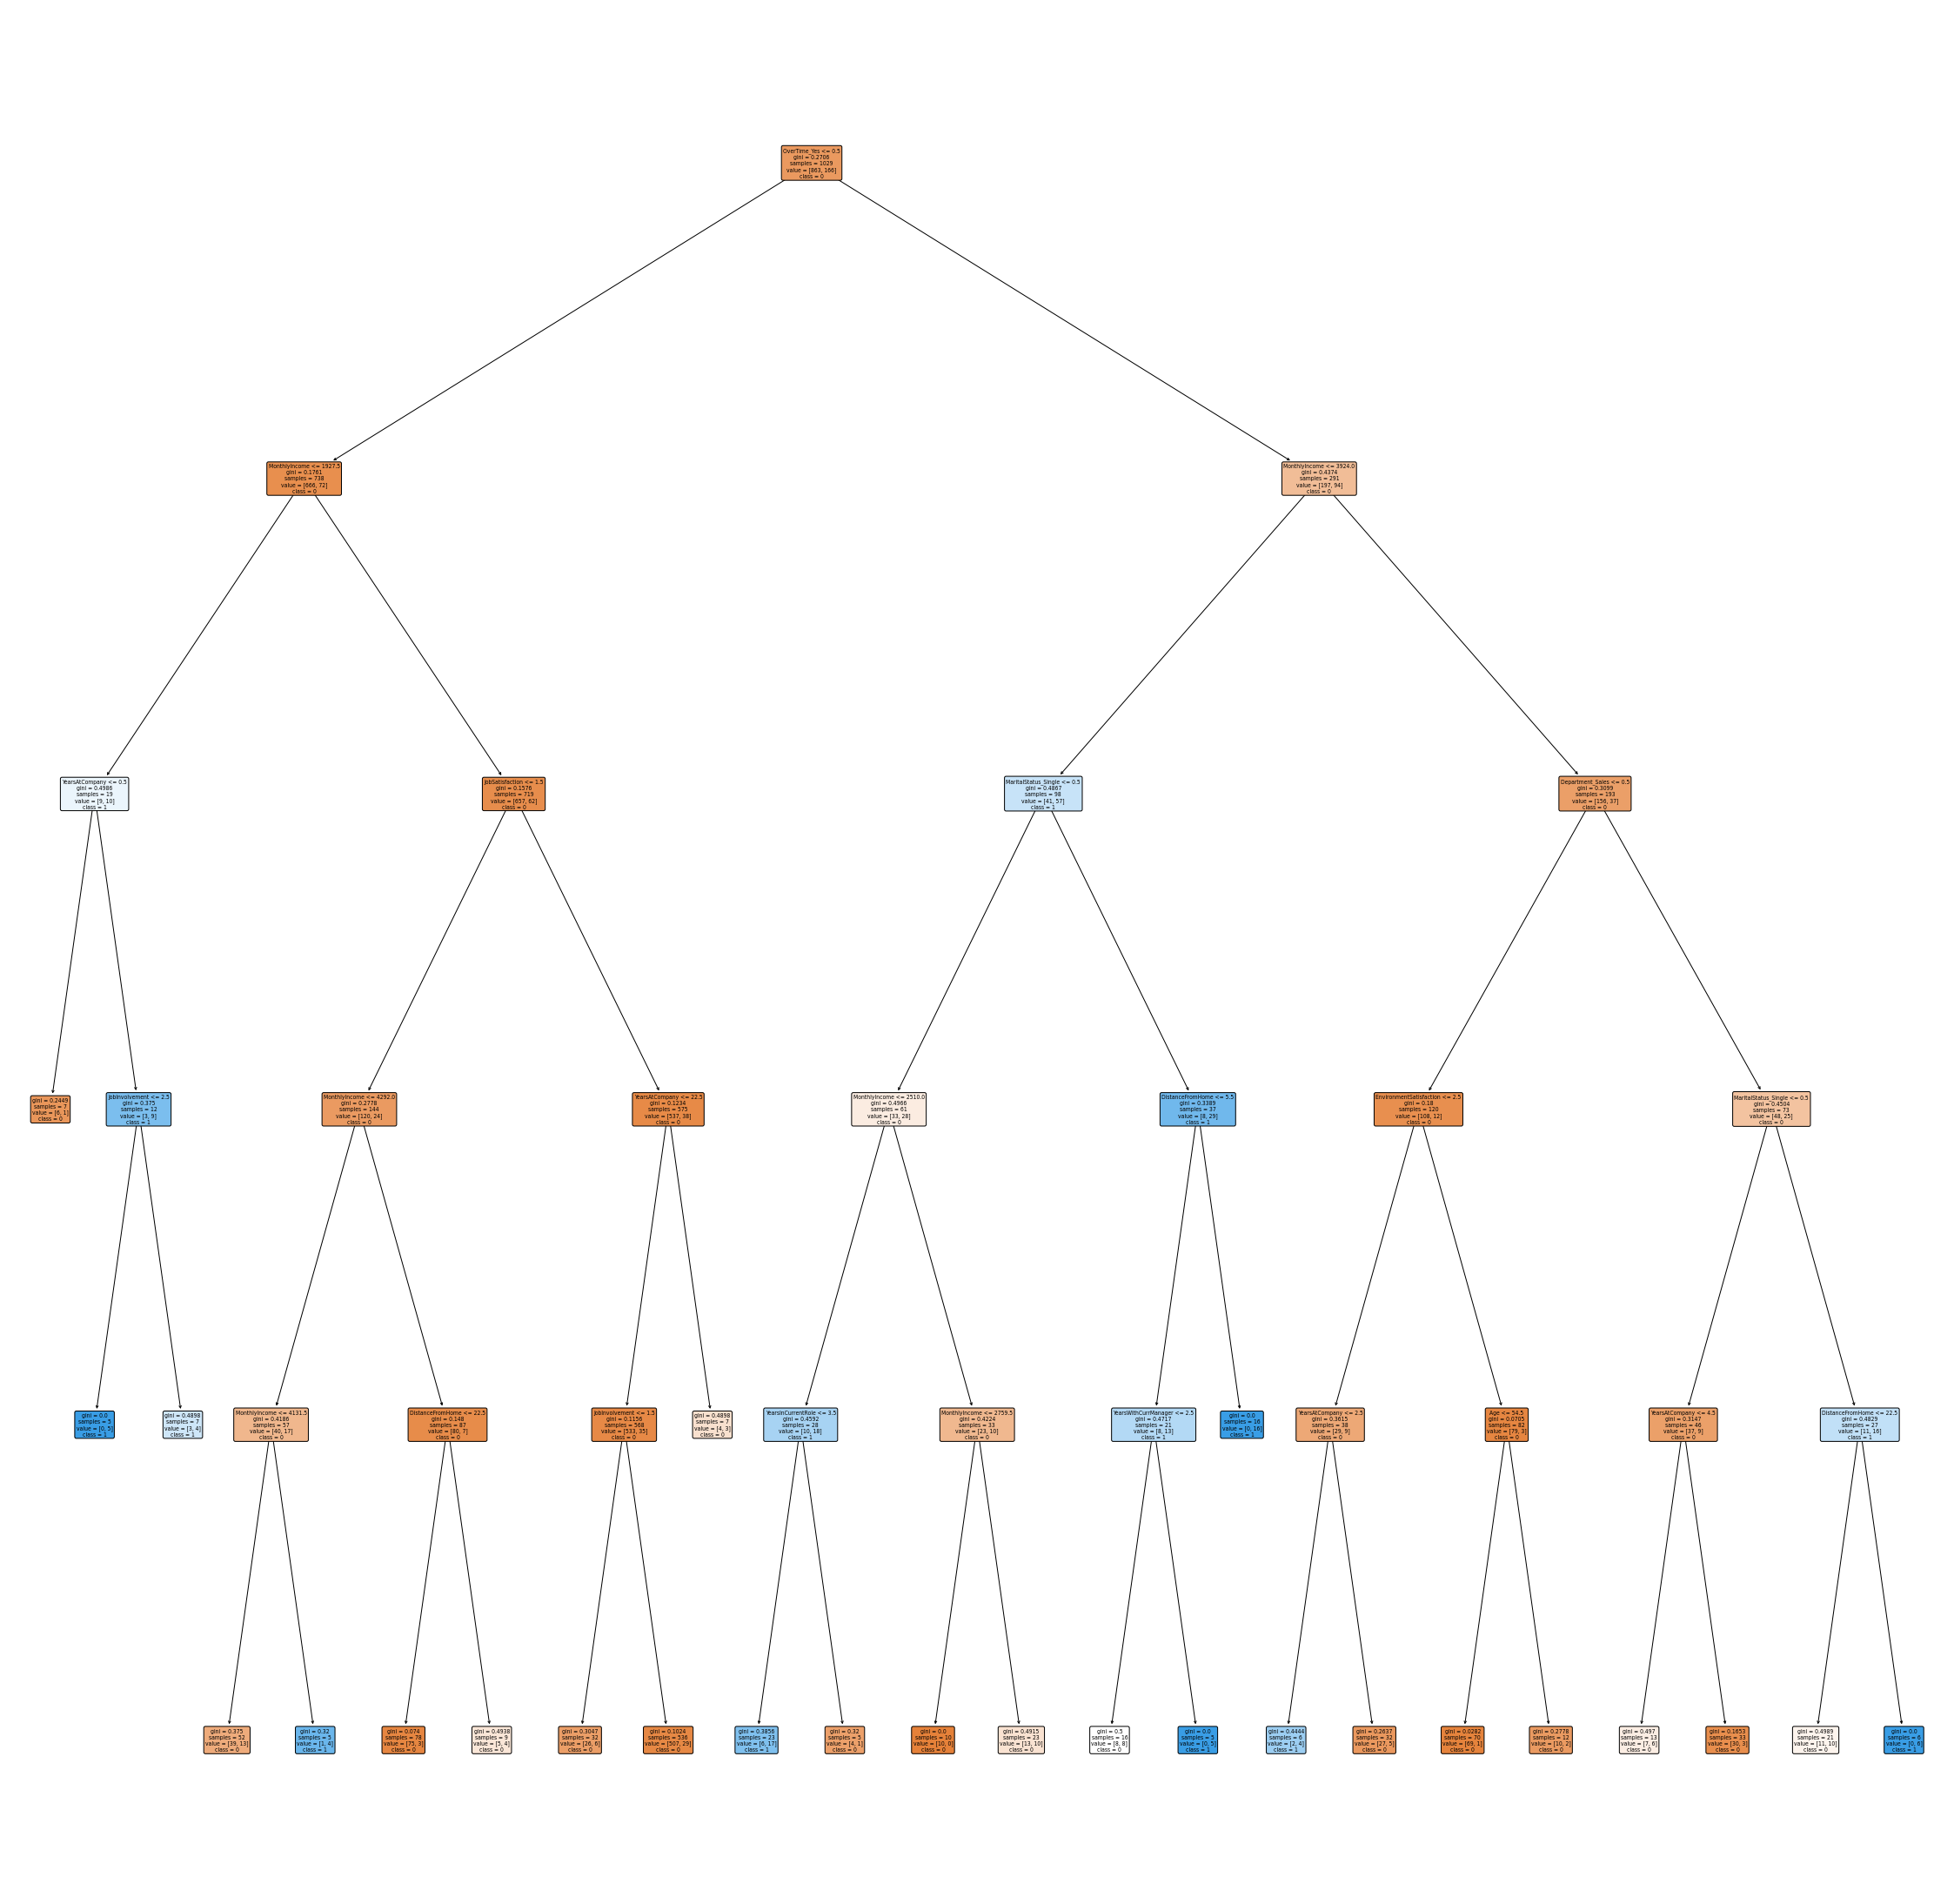

In [37]:
# Interpret the tree
fig = plt.figure(figsize = (40,40))

# filled = true to paint
dec_tree = plot_tree(decision_tree = classifier_gini, feature_names = feature_cols, 
                     class_names = ["0", "1"] , filled = True , precision = 4, rounded = True)

In [38]:
# do prediction on test
y_pred = classifier_gini.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [39]:
# form confusion matrix and find accuracy scores

c= confusion_matrix(y_test,y_pred)
c

array([[354,  16],
       [ 58,  13]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8321995464852607

In [41]:
# full report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       370
           1       0.45      0.18      0.26        71

    accuracy                           0.83       441
   macro avg       0.65      0.57      0.58       441
weighted avg       0.79      0.83      0.80       441



In [32]:
## precision for each class = tp/(tp+fp)   # how correct it is for positive
## recall = tp/(tp+fn)   # supposed to have been all positive
## accuracy = tp+tn/(tp+tn+fp+fn)